In [1]:
import pandas as pd
import numpy as np
import os
from pathlib import Path

# Define datasets and metrics
datasets = ['real1_Abalone', 'real2_WineQuality', 'real3_CalHousing', 
           'real4_Concrete', 'real5_BreastTumor', 'real6_echoMonths', 
           'real7_Satellite', 'real8_Triazines']
metrics = ['rhat', 'test_mse', 'pi_length', 'coverage', 'train_time']

# Results directory
results_dir = Path('results')

def load_and_summarize_metric(metric):
    """Load all dataset results for a specific metric and summarize"""
    summary_data = []
    
    for dataset in datasets:
        file_path = results_dir / f"{dataset}_{metric}.csv"
        
        if file_path.exists():
            try:
                # Read CSV file
                df = pd.read_csv(file_path)
                
                # Calculate mean and standard deviation for each column
                summary_row = {}
                summary_row['Dataset'] = dataset
                
                for column in df.columns:
                    mean_val = df[column].mean()
                    std_val = df[column].std()
                    # Format as mean(std) 
                    summary_row[column] = f"{mean_val:.4f}({std_val:.4f})"
                
                summary_data.append(summary_row)
                
            except Exception as e:
                print(f"Error processing {file_path}: {e}")
        else:
            print(f"File not found: {file_path}")
    
    return pd.DataFrame(summary_data)


Summary for RHAT
                  MultiBART_Rhat_Sigma2 DefaultBART_Rhat_Sigma2 MultiBART_Rhat_RMSE DefaultBART_Rhat_RMSE
Dataset                                                                                                  
real1_Abalone            1.1108(0.0849)          1.0866(0.0387)      1.1433(0.0804)        1.1927(0.0843)
real2_WineQuality        1.2037(0.1303)          1.0845(0.0311)      1.1690(0.0651)        1.2335(0.1068)
real3_CalHousing         1.7391(0.0465)          1.7997(0.1013)      1.9216(0.2622)        2.0734(0.3439)
real4_Concrete           1.1190(0.0590)          1.3260(0.1476)      1.3051(0.1035)        1.6413(0.2624)
real5_BreastTumor        1.0030(0.0024)          1.0127(0.0087)      1.2965(0.1952)        1.5895(0.2496)
real6_echoMonths         1.0258(0.0166)          1.0315(0.0187)      1.1689(0.0522)        1.5242(0.2029)
real7_Satellite          2.4766(0.1470)          1.8572(0.2058)      1.7004(0.4523)        1.5896(0.3289)
real8_Triazines          1.1

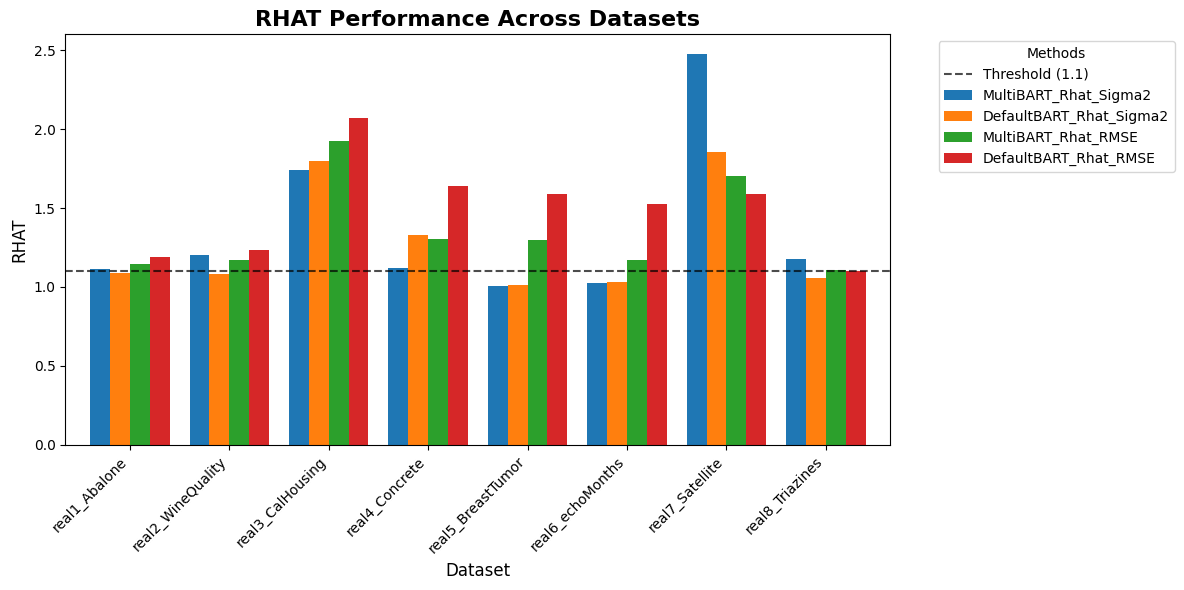


Summary for TEST_MSE
                          bart_mtmh              bart               btz                rf               xgb
Dataset                                                                                                    
real1_Abalone        4.9685(0.3454)    4.9305(0.3309)    4.9416(0.3074)    4.9276(0.2921)    5.5966(0.2619)
real2_WineQuality    0.4600(0.0241)    0.4742(0.0200)    0.4722(0.0169)    0.3730(0.0260)    0.4085(0.0229)
real3_CalHousing     0.2109(0.0051)    0.2178(0.0044)    0.2852(0.0060)    0.2610(0.0090)    0.2213(0.0054)
real4_Concrete      17.3820(2.7802)   19.5280(2.0119)   20.3190(3.0479)   25.4538(2.7630)   21.7897(4.6838)
real5_BreastTumor   87.6195(0.4722)   87.8810(0.4030)   87.8434(0.4569)  110.5386(0.6099)   89.2332(0.5569)
real6_echoMonths   129.4687(2.2397)  130.8527(2.3444)  131.1064(2.5459)  134.1892(2.7353)  142.4555(2.3940)
real7_Satellite      0.6240(0.0258)    0.6225(0.0298)    0.6223(0.0279)    0.5052(0.0262)    0.5390(0.0299)
real8_

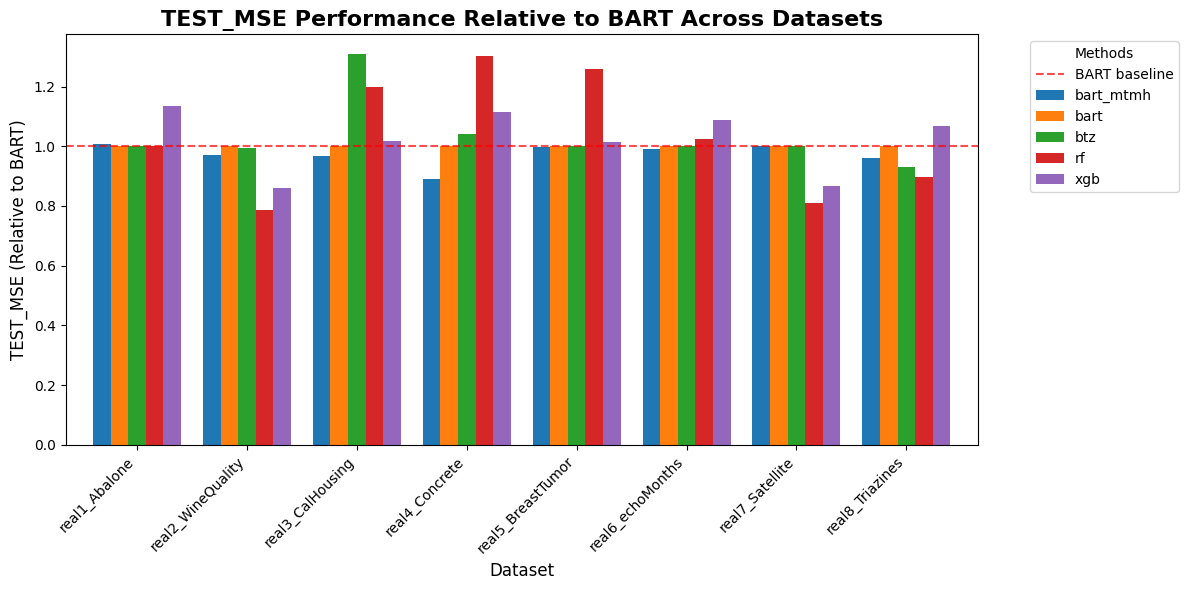


Summary for PI_LENGTH
                         bart_mtmh             bart              btz
Dataset                                                             
real1_Abalone       7.9578(0.1450)   8.0872(0.1360)   8.2785(0.0738)
real2_WineQuality   2.4780(0.0368)   2.5836(0.0252)   2.6638(0.0190)
real3_CalHousing    1.5254(0.0086)   1.6629(0.0169)   2.1610(0.0210)
real4_Concrete     13.5174(0.9954)  14.4774(0.4160)  16.5558(0.3335)
real5_BreastTumor  36.5254(0.0302)  36.5855(0.0414)  36.6827(0.0298)
real6_echoMonths   43.7530(0.1547)  44.1527(0.1400)  44.7788(0.1702)
real7_Satellite     1.8300(0.0612)   2.4293(0.0462)   2.8427(0.0523)
real8_Triazines     0.5054(0.0316)   0.5111(0.0224)   0.5302(0.0247)


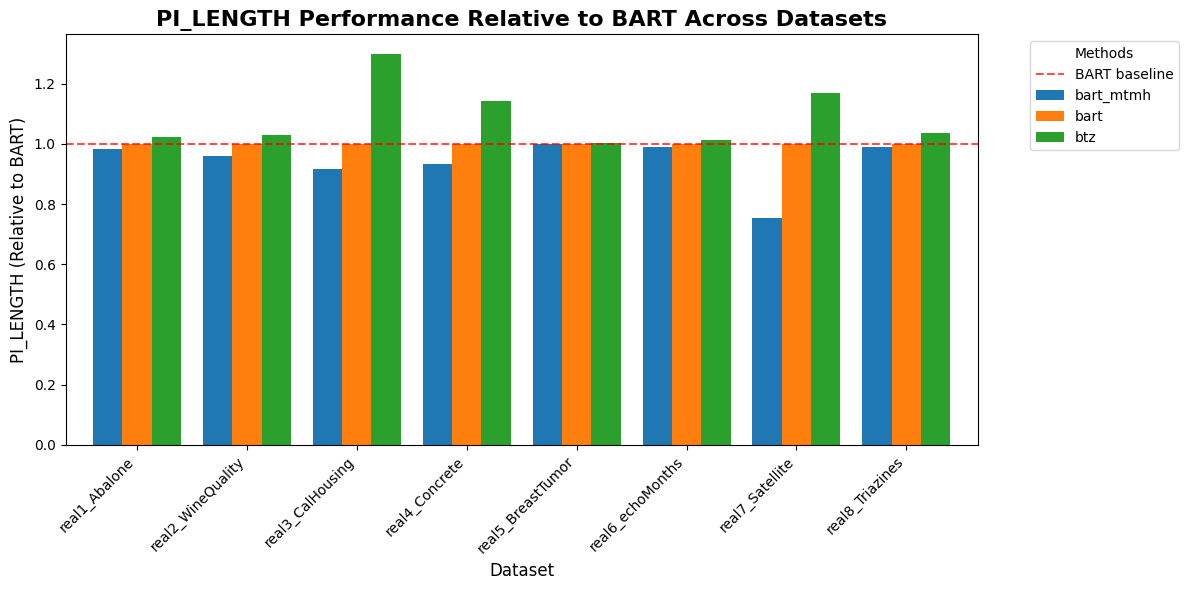


Summary for COVERAGE
                        bart_mtmh            bart             btz
Dataset                                                          
real1_Abalone      0.9285(0.0100)  0.9312(0.0071)  0.9336(0.0066)
real2_WineQuality  0.9330(0.0094)  0.9367(0.0050)  0.9426(0.0060)
real3_CalHousing   0.9223(0.0048)  0.9327(0.0044)  0.9481(0.0029)
real4_Concrete     0.9275(0.0219)  0.9132(0.0177)  0.9388(0.0167)
real5_BreastTumor  0.9361(0.0009)  0.9368(0.0008)  0.9375(0.0010)
real6_echoMonths   0.9361(0.0027)  0.9399(0.0037)  0.9424(0.0035)
real7_Satellite    0.8531(0.0086)  0.8932(0.0052)  0.9175(0.0065)
real8_Triazines    0.9426(0.0362)  0.9383(0.0381)  0.9489(0.0364)


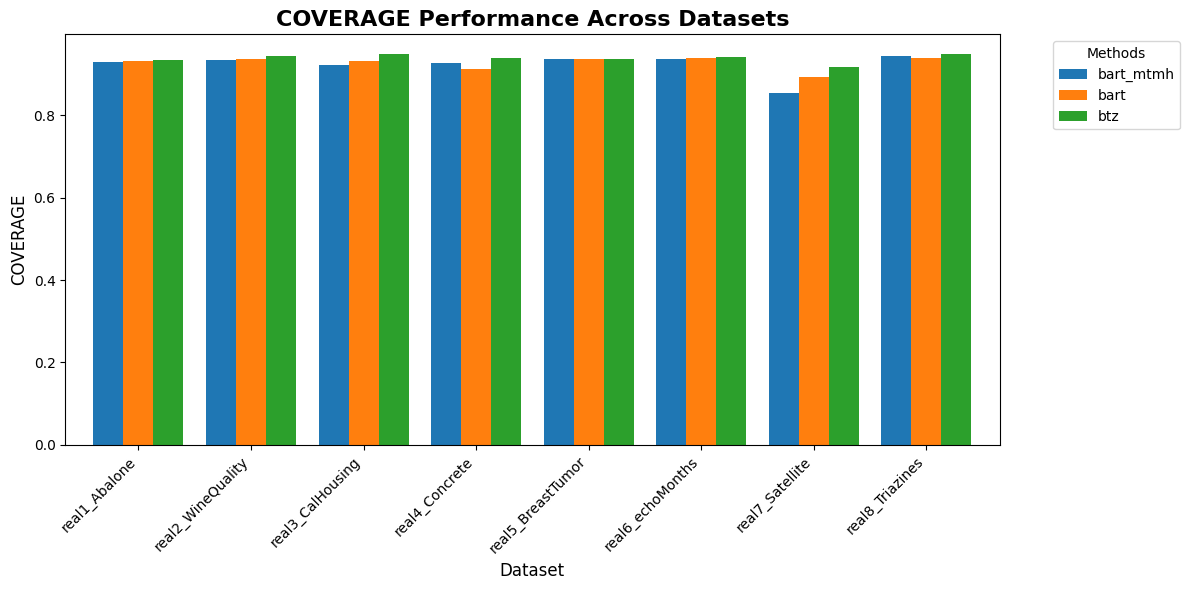


Summary for TRAIN_TIME
                             bart_mtmh               bart                btz               rf             xgb
Dataset                                                                                                      
real1_Abalone         221.2514(1.2811)    25.7918(4.2414)    32.0323(4.6173)   1.6276(0.4332)  0.1682(0.0980)
real2_WineQuality     290.3824(7.1042)    33.9113(1.2639)    51.1948(1.2206)   4.1692(0.0864)  0.2715(0.0542)
real3_CalHousing     774.2901(13.7794)    83.9846(3.6058)    72.7662(4.5856)  16.5880(2.3557)  0.2175(0.0667)
real4_Concrete        140.9726(4.0002)    17.9855(0.9175)    24.9442(0.8430)   0.5054(0.0313)  0.2131(0.0159)
real5_BreastTumor  3075.2180(106.8188)  360.6902(31.4693)  163.4781(11.6926)  29.4677(5.0372)  0.5390(0.2660)
real6_echoMonths      474.4978(8.0733)    62.8464(2.2287)    42.3543(1.9183)  10.7911(2.0447)  0.2899(0.0573)
real7_Satellite       285.0264(4.0295)    35.5117(5.7331)    32.4941(3.9400)   4.8170(0.5870)  0

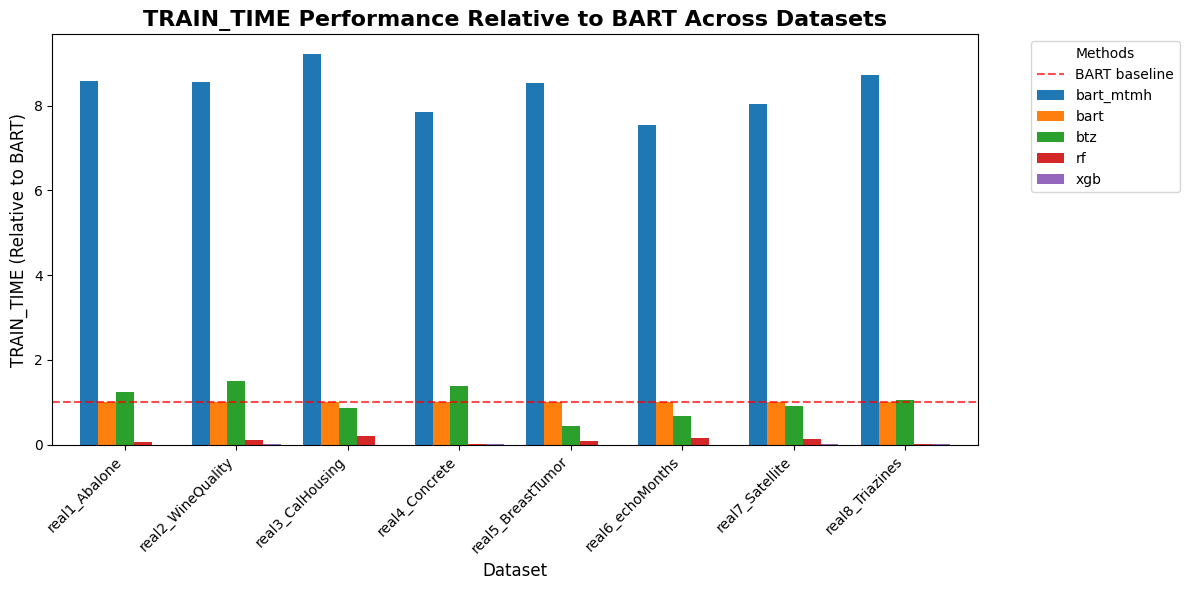

In [2]:
# Generate summary tables for each metric
import matplotlib.pyplot as plt
import seaborn as sns

for metric in metrics:
    print(f"\n{'='*50}")
    print(f"Summary for {metric.upper()}")
    print(f"{'='*50}")
    
    summary_df = load_and_summarize_metric(metric)
    
    if not summary_df.empty:
        # Set Dataset as index
        summary_df.set_index('Dataset', inplace=True)
        
        # Display table
        print(summary_df.to_string())
        
        # Create a numerical version for plotting
        plot_df = summary_df.copy()
        for col in plot_df.columns:
            # Extract mean values from "mean(std)" format
            plot_df[col] = plot_df[col].str.extract(r'(\d+\.?\d*)').astype(float)
        
        # Normalize data relative to BART performance (except for rhat and coverage)
        if metric not in ['rhat', 'coverage'] and 'bart' in plot_df.columns:
            for index in plot_df.index:
                bart_value = plot_df.loc[index, 'bart']
                if bart_value != 0:  # Avoid division by zero
                    plot_df.loc[index] = plot_df.loc[index] / bart_value
        
        # Create grouped bar chart
        fig, ax = plt.subplots(figsize=(12, 6))
        plot_df.plot(kind='bar', ax=ax, width=0.8)
        
        # Customize the plot
        if metric not in ['rhat', 'coverage']:
            ax.set_title(f'{metric.upper()} Performance Relative to BART Across Datasets', fontsize=16, fontweight='bold')
            ax.set_ylabel(f'{metric.upper()} (Relative to BART)', fontsize=12)
            # Add horizontal line at y=1 for reference
            ax.axhline(y=1, color='red', linestyle='--', alpha=0.7, label='BART baseline')
        else:
            ax.set_title(f'{metric.upper()} Performance Across Datasets', fontsize=16, fontweight='bold')
            ax.set_ylabel(f'{metric.upper()}', fontsize=12)
            if metric == 'rhat':
                # Add horizontal line at y=1.1 for rhat
                ax.axhline(y=1.1, color='black', linestyle='--', alpha=0.7, label='Threshold (1.1)')

        
        ax.set_xlabel('Dataset', fontsize=12)
        ax.legend(title='Methods', bbox_to_anchor=(1.05, 1), loc='upper left')
        
        # Rotate x-axis labels for better readability
        plt.xticks(rotation=45, ha='right')
        
        # Adjust layout to prevent clipping
        plt.tight_layout()
        plt.show()
        
    else:
        print(f"No data found for {metric}")

File not found: results\real5_BreastTumor_tries.csv


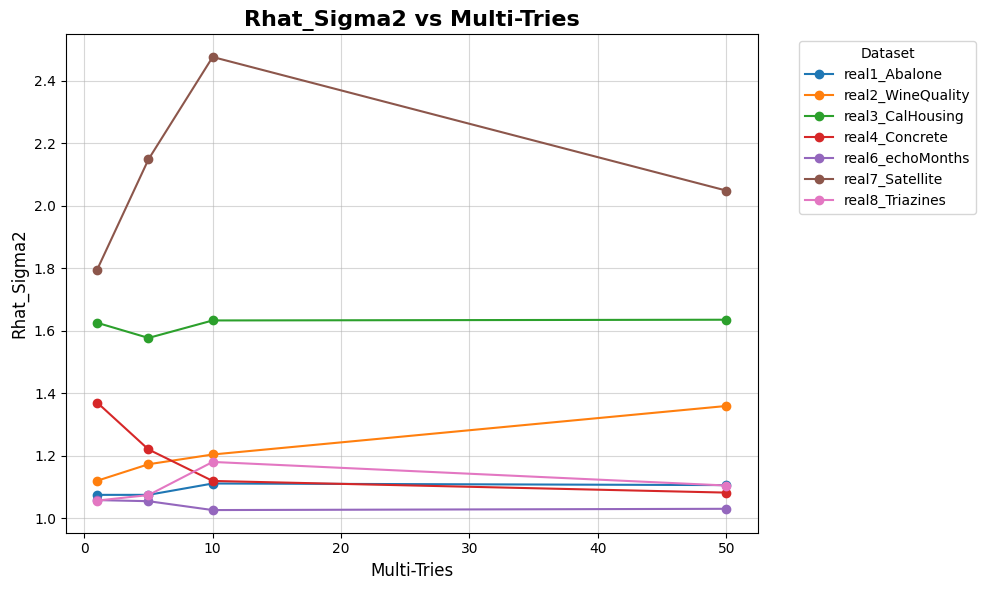

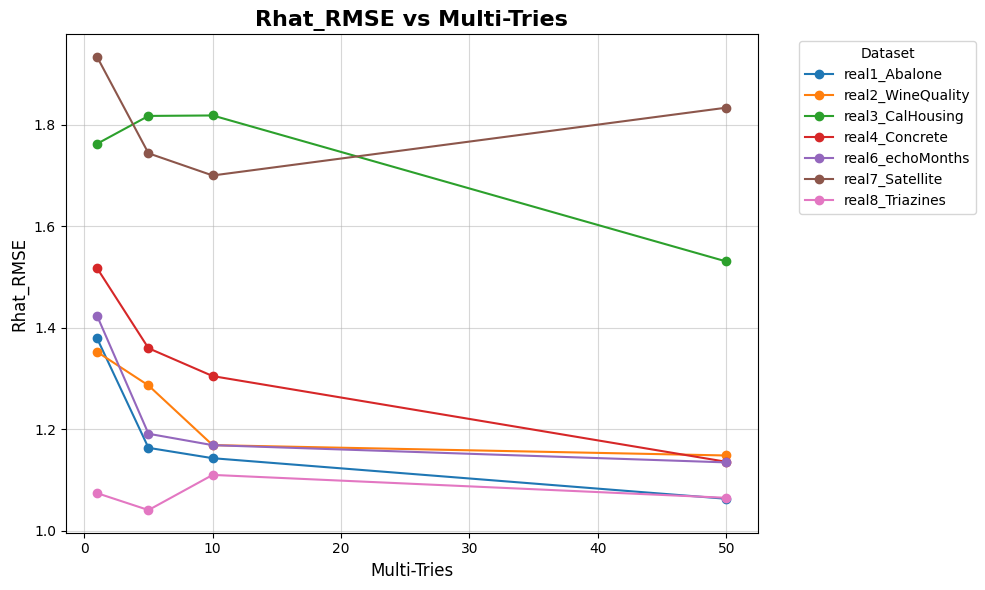

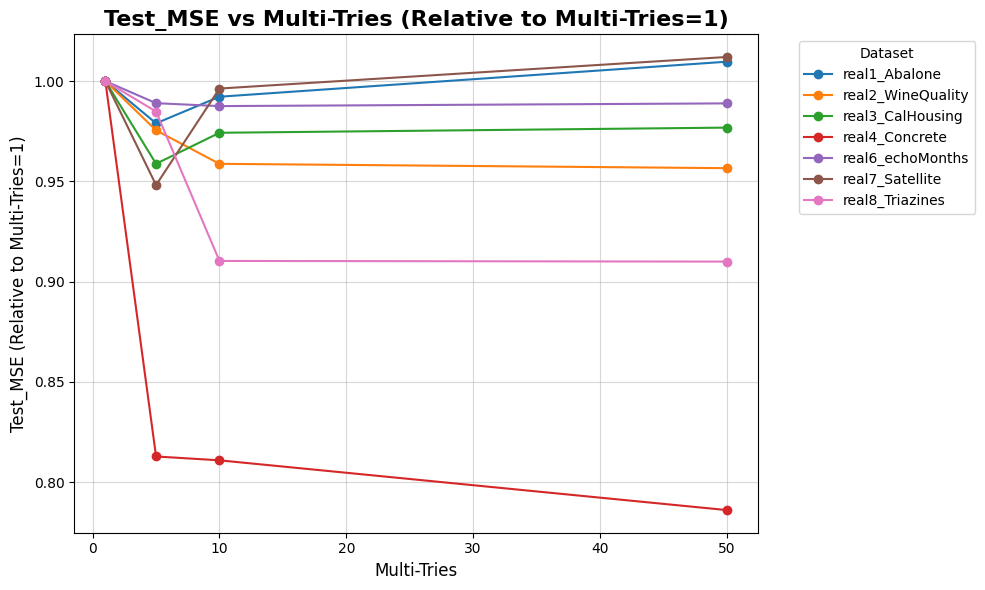

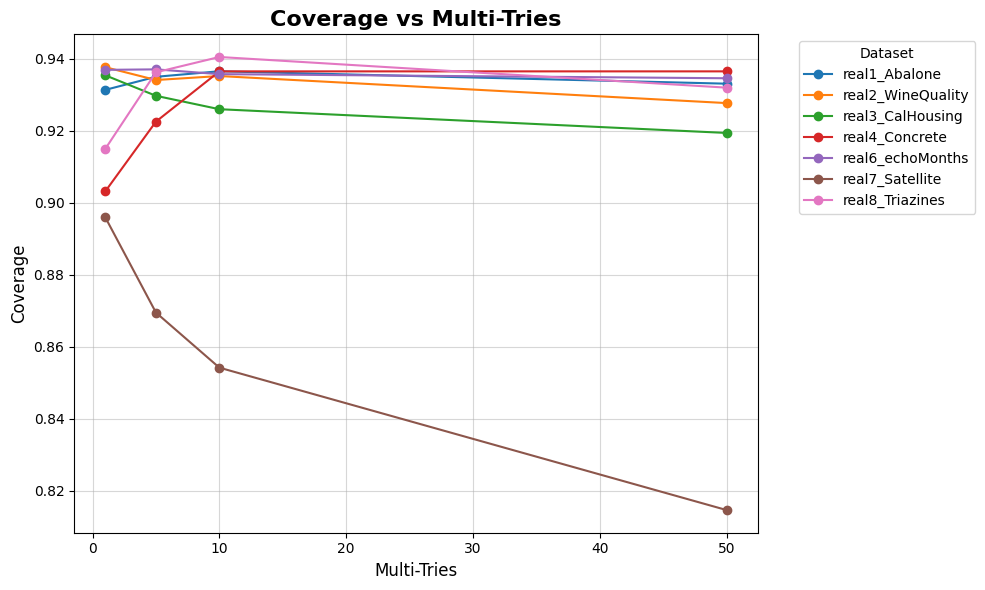

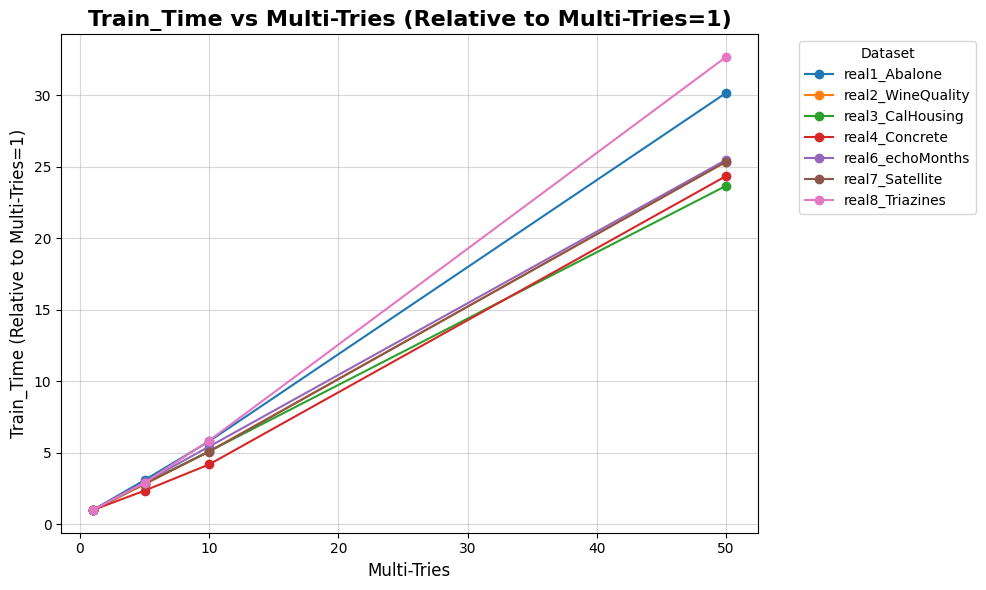

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Define datasets
datasets = ['real1_Abalone', 'real2_WineQuality', 'real3_CalHousing', 
           'real4_Concrete', 'real5_BreastTumor', 'real6_echoMonths', 
           'real7_Satellite', 'real8_Triazines']

# Results directory
results_dir = Path('results')

# Initialize a dictionary to store data for each metric
metric_data = {}

# Process each dataset's _tries.csv file
for dataset in datasets:
    file_path = results_dir / f"{dataset}_tries.csv"
    
    if file_path.exists():
        try:
            # Read the CSV file
            df = pd.read_csv(file_path)
            
            # Extract the column names (excluding the first column 'multi_tries')
            metrics = df.columns[1:]
            
            # Store the data for each metric
            for metric in metrics:
                if metric not in metric_data:
                    metric_data[metric] = []
                metric_data[metric].append((dataset, df['multi_tries'], df[metric]))
        
        except Exception as e:
            print(f"Error processing {file_path}: {e}")
    else:
        print(f"File not found: {file_path}")

# Plot each metric
for metric, data in metric_data.items():
    plt.figure(figsize=(10, 6))
    
    for dataset, multi_tries, values in data:
        # Normalize Test_MSE and Train_Time relative to their values at multi-tries=1
        if metric in ['Test_MSE', 'Train_Time']:
            values = values / values.iloc[0]
        
        plt.plot(multi_tries, values, marker='o', label=dataset)
    
    plt.xlabel('Multi-Tries', fontsize=12)
    if metric in ['Test_MSE', 'Train_Time']:
        plt.ylabel(f'{metric} (Relative to Multi-Tries=1)', fontsize=12)
        plt.title(f'{metric} vs Multi-Tries (Relative to Multi-Tries=1)', fontsize=16, fontweight='bold')
    else:
        plt.ylabel(metric, fontsize=12)
        plt.title(f'{metric} vs Multi-Tries', fontsize=16, fontweight='bold')
    plt.legend(title='Dataset', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(alpha=0.5)
    plt.tight_layout()
    plt.show()